# Lecture 3 Part 2 - Cross-Validation & Performance Measures for Regression Tasks

From the last period, we introduce one strategy to avoid overfitting: regularization. 

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

But there other strategies to apply in order to mitigate overfitting:

## Ways to Avoid Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

In this lecture, we will introduce **cross-validation**. Recall the implementation for the regularized polynomial regression model:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

In [ ]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [ ]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T #computes the phi(x) = [x^0, x^1, ...., x^M]
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t # Optimal set of parameters w
    # Compute model prediction
    y = X@w
    return w, y

def PolynomialRegression_reg(x,t,M,lam):
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    # Compute model prediction
    y = X@w
    return w, y

In [ ]:
M = 20
lam = 0.001

w, y, = PolynomialRegression(x_train,t_train,M) 
wreg, yreg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,yreg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

In [ ]:
def PolynomialRegression_test(x,M,w):
    # Feature matrix for test set
    X = np.array([x**m for m in range(M+1)]).T
    
    # Prediction for test set
    y = X@w
    
    return y

In [ ]:
# Prediction for test set using non-regularized model
y_test = PolynomialRegression_test(x_test, M, w)

# Prediction for test set using regularized model
y_test_reg = PolynomialRegression_test(x_test, M, wreg)

# Plotting
fig=plt.figure(figsize=(10,6))
plt.plot(x_true, t_true, '--g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test,y_test,'r', label = 'Polynomial Regression')
plt.plot(x_test,y_test_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Test Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Fine-tuning the Hyperparameters

The hyperparameters of ridge regression are the model order $M$ and the regularizer coefficient $\lambda$.

How would you choose which value to use? -- Cross-validation.

---

# Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrrence of overfitting, but it does not eliminate it entirely.

* Reading: [Sections 19.1-19.6](https://ufl.instructure.com/courses/455013/external_tools/412362?display=borderless) from the Alpaydin textbook and [Section 5.3 Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the "Python Data Science Handbook" textbook.

---

# Performance Measures

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which _quantitative_ measure would you use to compare model performances?

## Error Measures

Error measures are always a good start for **regression** tasks. Some examples include:

* **Mean Squared Error (MSE)** - best when the data does not have outliers. The MSE will penalize outliers heavily.

* **Mean Absolute Error (MAE)** - best when you suspect data has outliers.

In [ ]:
# Residual error for Training data for polynomial regression without and with regularizer
error_train = t_train - y 
error_train_reg = t_train - yreg 

# Residual error for Test data for polynomial regression without and with regularizer
error_test = t_test - y_test
error_test_reg = t_test - y_test_reg

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(error_train**2))
print('With regularizer: ', np.mean(error_train_reg**2),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(error_test**2))
print('With regularizer: ', np.mean(error_test_reg**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(np.abs(error_train)))
print('With regularizer: ', np.mean(np.abs(error_train_reg)),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(np.abs(error_test)))
print('With regularizer: ', np.mean(np.abs(error_test_reg)),'\n')

Other error-based measures can be considered, e.g., normalized mean squared error (NMSE), normalized mean absolute error (NMAE), etc.

## Q-Q Plot

We can also use the **Quantile-Quantile (Q-Q)** plot to assess qualitative measures of goodness-of-fit.

* The Q-Q plot help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential, or if two sets of samples were drawn from the same distribution. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It's just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

* What are *quantiles*? These are often referred to as *percentiles*. These are points in your data below which a certain proportion of your data fall which are captured in the Cumulative Distribution Function (CDF) of a random variable. For example, imagine the classic bell-curve standard Normal distribution with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. That's the peak of the hump in the curve. The 0.95 quantile, or 95th percentile, is about 1.64. 95 percent of the data lie below 1.64.

In [ ]:
base = np.linspace(min(t_test),max(t_test),100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.scatter(np.sort(t_test), np.sort(y_test))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base,base,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model without regularizer',size=20)

plt.subplot(1,2,2); plt.scatter(np.sort(t_test), np.sort(y_test_reg))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base,base,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model with regularizer',size=20);

And then take a summative **quantitative** measure, namely the **coefficient of determination**.

In [ ]:
import scipy.stats as stats

print('Polynomial Regression Without Regularization - Test Set')
m, b, r, p, _ = stats.linregress(np.sort(t_test), np.sort(y_test))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)
print('-------------------')
print('Polynomial Regression With Regularization - Test Set')
m, b, r, p, _ = stats.linregress(np.sort(t_test), np.sort(y_test_reg))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)

For most applications, we want a model with a coefficient of determination $r^2\geq99\%$.

In this example, the exponential performs better than the polynomial model in the test set.

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

# Coming back to Cross-Validation

Let's consider the **MSE** as our performance measure. There are different strategies for implementing cross-validation:

1. k-fold cross-validation
2. Leave-One-Out cross-validation
3. Stratified cross-validation
4. $k\times 2$ cross-validation

We also need to make sure that classes are represented in the right proportions when subsets of data are held out, not to disturb the class prior probabilities; this is called **stratiﬁcation**. If a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples.

---

## $1\times 2$ cross-validation

Let's consider the case, where we only have a single validation set which resulted from splitting the training data into a training set and a validation set with splitting rations 70% and 30% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

x_train2, x_validation, t_train2, t_validation = train_test_split(x_train, 
                                                                  t_train, 
                                                                  test_size=0.3,
                                                                 shuffle=True)

x_train2.shape, x_validation.shape, t_train2.shape, t_validation.shape

Let's now vary the values for $M$ and estimate the associated coefficients $\mathbf{w}$ using the training set. Then, let's evaluate performance measure (e.g. MSE) in both training and validation sets:

In [ ]:
M_vals = range(1,12)

MSE_train = []
MSE_val = []
for M in M_vals:
    
    # Train the model (without regularization for simplicity of illustration)
    
    
    # Make predictions for the training and validation sets
    
    
    
    # Performance Measure
    
    

# Plotting results
plt.figure(figsize=(10,5))
plt.plot(M_vals, MSE_train, '-og',label='Training Set')
plt.plot(M_vals, MSE_val, '-or',label='Validation Set')
plt.legend(fontsize=15)
plt.xlabel('Model order, $M$', size=15)
plt.ylabel('Performance Measure, MSE', size=15);

* Which model order would you choose? Why?

The phenomenon we observe here is known as the **bias-variance trade-off** (more next lecture).

---

## K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

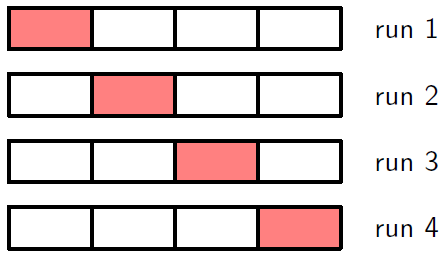

In [1]:
from IPython.display import Image
Image('figures/Kfold CV.png',width=400)

In [ ]:
from sklearn.model_selection import KFold



**Goal:** find the best value for the **hyperparameters** $M$ (model order) and $\lambda$ (regularization trade-off parameter).

Let's use **4-fold cross-validation** on this data:

In [ ]:
# Split training feature matrix into training and validation sets

f=1
for train_index, validation_index in kf.split(x_train):
    print('Fold ', f)
    print('The training set has ', train_index.shape[0],' samples')
    print('Their index locations are: ', train_index)
    print('The validation set has ', validation_index.shape[0],' samples')
    print('Their index locations are: ', validation_index,'\n\n')
    f+=1

In [ ]:
# Set of values for lambda to explore
M_vals = range(1,21)
lam_vals= np.arange(0.1,1.1,0.1)

for M in M_vals:
    for lam in lam_vals:
        
        print('M Value = ',M)
        print('Lambda Value = ',lam)
        
        # For each training/validation split
        f=1
        
        #initialize performance measures
        MSE_train_avg,MSE_val_avg = 0, 0
        
        for train_index, validation_index in kf.split(x_train):
            print('\nFold ',f)
            
            # Select training set using the indices found from kf.split
            x_train2, x_validation = x_train[train_index], x_train[validation_index]
            
            # Select validation set using the indices found from kf.split
            t_train2, t_validation = t_train[train_index], t_train[validation_index]
            
            # Training model with training set
            w, y_train = PolynomialRegression_reg(x_train2, t_train2, M, lam)
            
            # Evaluate trained model in validation set
            y_val = PolynomialRegression_test(x_validation, M, w)
            
            # Performance Measure
            MSE_train = np.mean((t_train2-y_train)**2)
            MSE_val   = np.mean((t_validation-y_val)**2)
            
            # Average performance measure
            MSE_train_avg = MSE_train_avg+MSE_train
            MSE_val_avg = MSE_val_avg+MSE_val
            print('MSE Training = ', MSE_train)
            print('MSE Validation = ', MSE_val)
            f+=1
            
        print('\nAverage Performance in Training = ', MSE_train_avg/k)
        print('Average Performance in Validation = ', MSE_val_avg/k)
        print('-----------------------------------------------------\n')

#### Discussion

* We select the set of hyperparameters $\{M,\lambda\}$ with the best performance score (e.g. smallest MSE or largest $r^2$).

* If the value of the hyperparameter falls at the edge of provided range of values, it is appropriate to expand the range of values for further exploration.

* Other performance measures can be used, for example, the coefficient of determination of the Q-Q plot for regression tasks, or accuracy score for classification tasks.

---

## Leave-One-Out Cross-Validation

One extreme case of cross-validation is the **leave-one-out** where given a dataset of $N$ instances, only one instance is left out as the validation set (instance) and training uses the $N − 1$ instances. We then get $N$ separate pairs by leaving out a different instance at each iteration. This is typically used in applications such as medical diagnosis, where labeled data is hard to ﬁnd. Leave-one-out **does not permit stratiﬁcation**.

---